<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Calibration-files" data-toc-modified-id="Calibration-files-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Calibration files</a></span></li><li><span><a href="#Vectorized---theory-test" data-toc-modified-id="Vectorized---theory-test-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Vectorized - theory test</a></span><ul class="toc-item"><li><span><a href="#reading-back-in-like-before" data-toc-modified-id="reading-back-in-like-before-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>reading back in like before</a></span><ul class="toc-item"><li><span><a href="#scatterplots" data-toc-modified-id="scatterplots-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>scatterplots</a></span></li><li><span><a href="#pcolormesh" data-toc-modified-id="pcolormesh-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>pcolormesh</a></span></li></ul></li></ul></li><li><span><a href="#Exporting-data-for-fig4" data-toc-modified-id="Exporting-data-for-fig4-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exporting data for fig4</a></span><ul class="toc-item"><li><span><a href="#Noise-floor-fluctuations" data-toc-modified-id="Noise-floor-fluctuations-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Noise floor fluctuations</a></span></li><li><span><a href="#measurement" data-toc-modified-id="measurement-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>measurement</a></span></li><li><span><a href="#theory" data-toc-modified-id="theory-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>theory</a></span></li><li><span><a href="#compare-linecuts" data-toc-modified-id="compare-linecuts-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>compare linecuts</a></span><ul class="toc-item"><li><span><a href="#SM-fig-for-extra-detuning" data-toc-modified-id="SM-fig-for-extra-detuning-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>SM fig for extra detuning</a></span><ul class="toc-item"><li><span><a href="#load-theory" data-toc-modified-id="load-theory-4.4.1.1"><span class="toc-item-num">4.4.1.1&nbsp;&nbsp;</span>load theory</a></span></li></ul></li></ul></li><li><span><a href="#outlier-removal" data-toc-modified-id="outlier-removal-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>outlier removal</a></span><ul class="toc-item"><li><span><a href="#outlier-removal-versus-bias-current" data-toc-modified-id="outlier-removal-versus-bias-current-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>outlier removal versus bias current</a></span></li><li><span><a href="#filter-versus-pump-power" data-toc-modified-id="filter-versus-pump-power-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>filter versus pump power</a></span></li></ul></li><li><span><a href="#comparing-$-\Omega$-and-$+\Omega$-sidebands" data-toc-modified-id="comparing-$-\Omega$-and-$+\Omega$-sidebands-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>comparing $-\Omega$ and $+\Omega$ sidebands</a></span><ul class="toc-item"><li><span><a href="#Amplitudes" data-toc-modified-id="Amplitudes-4.6.1"><span class="toc-item-num">4.6.1&nbsp;&nbsp;</span>Amplitudes</a></span></li><li><span><a href="#Sensitivities" data-toc-modified-id="Sensitivities-4.6.2"><span class="toc-item-num">4.6.2&nbsp;&nbsp;</span>Sensitivities</a></span></li><li><span><a href="#Theory" data-toc-modified-id="Theory-4.6.3"><span class="toc-item-num">4.6.3&nbsp;&nbsp;</span>Theory</a></span></li><li><span><a href="#Outlier-removal" data-toc-modified-id="Outlier-removal-4.6.4"><span class="toc-item-num">4.6.4&nbsp;&nbsp;</span>Outlier removal</a></span></li><li><span><a href="#linecuts" data-toc-modified-id="linecuts-4.6.5"><span class="toc-item-num">4.6.5&nbsp;&nbsp;</span>linecuts</a></span></li></ul></li></ul></li></ul></div>

# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from scipy.interpolate import InterpolatedUnivariateSpline
from src.model_currentbias import f0
from src.algo_peakheights import func_Smpx_to_dBm, func_PdBmtoV
from src.algo_inputoutput import nphot_to_a0
from src.algo_sensitivity import Sens
import pickle
import stlabutils
import glob
from scipy.interpolate import griddata
import copy
import matplotlib.colors as colors
import matplotlib.cm as cm

# Calibration files

In [2]:
fitpars_vs_Is = pickle.load(
    open("data_processed/sensitivity_estimation/fitpars_vs_Is.pkl", "rb"))

In [3]:
fr, Lr, Ic = pickle.load(open(
    'data_processed/sensitivity_estimation/popt_simulation_JJarrays.pkl', 'rb'))

In [4]:
fr,Lr,Ic

(7514793068.270155, 3.4579690944669516e-09, 9.176089241631507e-06)

In [5]:
Iac=10e-9
Omega=1e3

In [6]:
power_gain = pickle.load(
    open("data_processed/sensitivity_estimation/gaindata.pkl", "rb"))
gain=power_gain['Gain (dB)']
noise=power_gain['Noisefloor (dBm)']
power_gain

{'Gain (dB)': 96.12117470339795,
 'Noisefloor (dBm)': -97.4676940230596,
 'P_noise_HEMT (dBm)': -195.58886872645755}

In [7]:
power_in = pickle.load(
    open("data_processed/sensitivity_estimation/power_in.pkl", "rb"))
Sin0 = power_in['V_in_sample (V)']
power_in

{'P_in_HEMT (dBm)': -131.33617812606127,
 'P_in_sample (dBm)': -129.33617812606127,
 'P_noise_HEMT (dBm)': -165.58886872645755,
 'Pout_VNA (dBm)': 0.0,
 'SNRout_dB (dB)': 34.252690600396264,
 'V_in_sample (V)': 1.079421573497245e-07,
 'atten_sample_HEMT (dB)': 2,
 'diff_attenuation (dB)': 65,
 'input_att_SG (dB)': -66.33617812606127,
 'input_att_VNA (dB)': -131.33617812606127}

In [8]:
popt = pickle.load(open(
    'data_processed/sensitivity_estimation/popt_simulation_JJarrays.pkl', 'rb'))
fr,Lr,Ic=popt
popt

[7514793068.270155, 3.4579690944669516e-09, 9.176089241631507e-06]

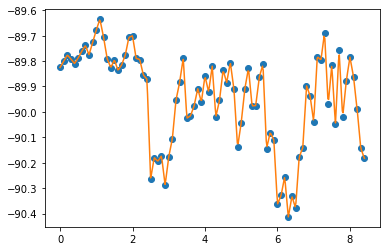

In [9]:
noisefile = glob.glob('data_plots/pos2/F33_pwr__noisefloor.pkl')
noisedata = pickle.load(open(noisefile[0],'rb'))
expnoise_raw = noisedata.iloc[len(noisedata)//2]
xx, yy = expnoise_raw.axes[0].values, expnoise_raw.values
expnoisef = interp1d(xx,yy)
plt.plot(xx,yy,'o')
ii = np.linspace(min(xx),max(xx),401)
plt.plot(ii,expnoisef(ii))
# plt.plot([min(xx),max(xx)],[expnoise,expnoise],'k:')

# Vectorized - theory test

## reading back in like before

### scatterplots

In [128]:
expfiles = sorted(glob.glob('data_final/fig3_panel_Ppump_1JJ_*.pkl'))
itheo = np.array([])
xtheo = np.array([])
ytheo = np.array([])
xtheo2 = np.array([])
ytheo2 = np.array([])
betas = np.array([])
kis = np.array([])
kes = np.array([])
f0s = np.array([])
g1s = np.array([])
for expfile in expfiles:
    expdata = pickle.load(open(expfile,'rb'))
    if not np.any(np.isnan(expdata['ytheo'])):
        itheo = np.append(itheo,[expdata['Iset (A)']]*len(expdata['xtheo']))
        xtheo = np.append(xtheo,expdata['xtheo'])
        ytheo = np.append(ytheo,expdata['ytheo'])
        xtheo2 = np.append(xtheo2,expdata['xtheo2'])
        ytheo2 = np.append(ytheo2,expdata['ytheo2'])
        betas = np.append(betas,expdata['Beta (Hz)'])
        kis = np.append(kis,expdata['kint (Hz)'])
        kes = np.append(kes,expdata['kext (Hz)'])
        f0s = np.append(f0s,expdata['fpump (Hz)'])
        g1s = np.append(g1s,expdata['G1 (Hz/A)'])

In [129]:
mycurrs = itheo.reshape(len(expfiles),itheo.shape[0]//len(expfiles))
mycurrs = mycurrs[:,0]

In [130]:
thres=-85
# idx = np.where(ymeas>thres)
idxt = np.where(ytheo>thres)

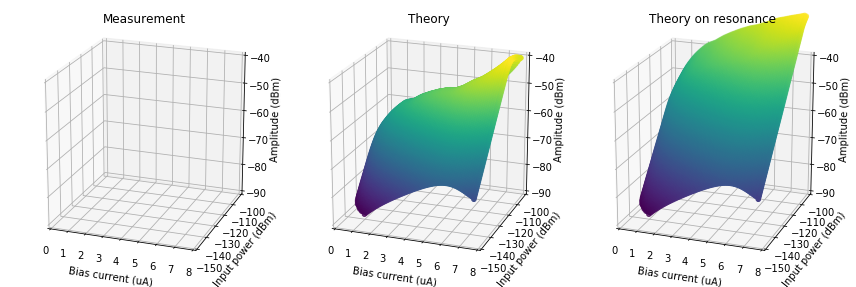

In [131]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(331, projection='3d')
# ax.scatter(iexp[idx]/1e-6, xmeas[idx], ymeas[idx], c=ymeas[idx], marker='o', cmap='viridis',clim=(-90,40))
plt.title('Measurement')

axt = fig.add_subplot(332,projection='3d')
axt.scatter(itheo[idxt]/1e-6, xtheo[idxt], ytheo[idxt], c=ytheo[idxt], marker='o',cmap='viridis',clim=(-90,40))
plt.title('Theory')

axt2 = fig.add_subplot(333,projection='3d')
axt2.scatter(itheo[idxt]/1e-6, xtheo2[idxt], ytheo2[idxt], c=ytheo2[idxt], marker='o',cmap='viridis',clim=(-90,40))
plt.title('Theory on resonance')

for theax in [ax,axt,axt2]:
    theax.view_init(20,-70)
    theax.set_xlim(0,8)
    theax.set_ylim(-150,-100)
    theax.set_zlim(-90,-40)

    theax.set_xlabel('Bias current (uA)')
    theax.set_ylabel('Input power (dBm)')
    theax.set_zlabel('Amplitude (dBm)')
    
plt.tight_layout()

### pcolormesh

In [132]:
expfiles = sorted(glob.glob('data_final/fig3_panel_Ppump_1JJ_*.pkl'))
itheo = []
xtheo = []
ytheo = []
xtheo2 = []
ytheo2 = []
for expfile in expfiles:
    expdata = pickle.load(open(expfile,'rb'))
    if not np.any(np.isnan(expdata['ytheo'])):
        itheo.append([expdata['Iset (A)']]*len(expdata['xtheo']))
        xtheo.append(expdata['xtheo'])
        ytheo.append(expdata['ytheo'])
        xtheo2.append(expdata['xtheo2'])
        ytheo2.append(expdata['ytheo2'])
    
itheo = np.array(itheo)
xtheo = np.array(xtheo)
ytheo = np.array(ytheo)
xtheo2 = np.array(xtheo2)
ytheo2 = np.array(ytheo2)

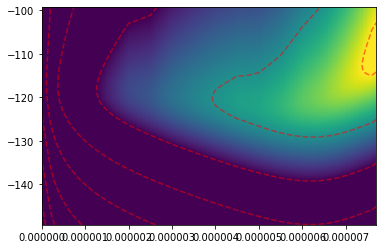

In [133]:
plt.pcolormesh(itheo,xtheo,ytheo,shading='gouraud')
plt.clim(-60,-40)
plt.contour(itheo,xtheo,ytheo,colors='red',alpha=0.5,linestyles='dashed')

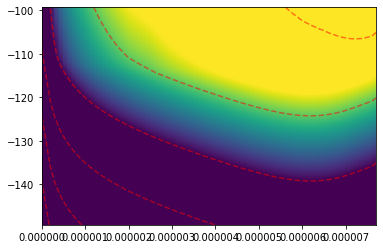

In [134]:
plt.pcolormesh(itheo,xtheo2,ytheo2,shading='gouraud')
plt.clim(-60,-40)
plt.contour(itheo,xtheo2,ytheo2,colors='red',alpha=0.5,linestyles='dashed')

# Exporting data for fig4

note we first have to convert amplitude to sensitivity

## Noise floor fluctuations

The noise floor fluctuates as we vary the bias current. This is weird? It might also be the origin for the "wiggly" sensitivity as a function of bias current, since all other values are taken from smooth fits. Let's use the average noise floor for the theoretical predictions.

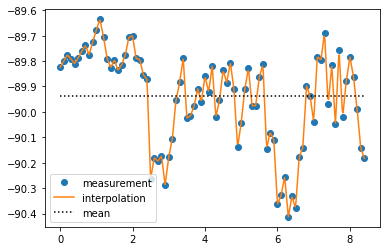

In [10]:
noisefile = glob.glob('data_plots/pos2/F33_pwr__noisefloor.pkl')
noisedata = pickle.load(open(noisefile[0],'rb'))
expnoise_raw = noisedata.iloc[len(noisedata)//2]
xx, yy = expnoise_raw.axes[0].values, expnoise_raw.values
# Linearize noise floor
yylin = 10**(yy/10) # from dBm to mW
expnoisemean = np.mean(yylin) # in mW
expnoisemean_log = 10*np.log10(expnoisemean) # from mW to dBm
expnoisef = interp1d(xx,yy)
plt.plot(xx,yy,'o',label='measurement')
ii = np.linspace(min(xx),max(xx),401)
plt.plot(ii,expnoisef(ii),label='interpolation')
plt.plot([min(xx),max(xx)],[expnoisemean_log,expnoisemean_log],'k:',label='mean')
plt.legend(loc='lower left')

## measurement

In [367]:
myfile = glob.glob('data_plots/pos2/F33_pwr_f0-1f1_mtx_amplitude.pkl')
ampltd2d=pickle.load(open(myfile[0],'rb'))
# ampltd2d.reset()

In [368]:
# ampltd2d.pmtx

In [369]:
x2d = ampltd2d.pmtx.axes[0].values+power_in['input_att_SG (dB)']+2
i2d = ampltd2d.pmtx.axes[1].values
y2d = ampltd2d.pmtx.values

In [370]:
xxx,yyy=np.meshgrid(i2d,x2d)

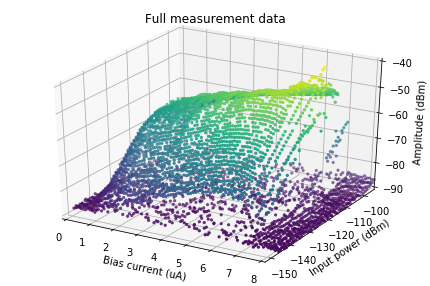

In [371]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(221, projection='3d')
ax.scatter(xxx,yyy,y2d, c=y2d.flatten(), marker='.',cmap='viridis',clim=(-90,40))
# ax.plot_surface(xxx, yyy, y2d,linewidth=0,antialiased=False,cmap=cm.viridis,vmin=-90,vmax=-40)
ax.set_zlim(-90,-40)
# ax.view_init(20,-60)
ax.set_xlim(0,8)
ax.set_title('Full measurement data')
ax.set_xlabel('Bias current (uA)')
ax.set_ylabel('Input power (dBm)')
ax.set_zlabel('Amplitude (dBm)')
plt.tight_layout()

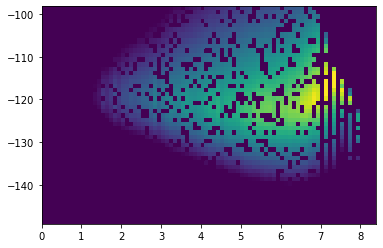

In [342]:
plt.pcolormesh(xxx,yyy,y2d)
plt.clim(-60,-40)

Now we convert amplitude to sensitivity and find the minimum value

In [376]:
# y2d = Sens(ipp=Iac, signal=y2d, background=expnoisef(i2d*1e-6), RBW=5)/1e-12
y2d = Sens(ipp=Iac, signal=y2d, background=expnoisemean_log, RBW=5)/1e-12

In [377]:
np.nanmin(y2d)

8.901255382724944

In [378]:
idxmin, idymin = np.unravel_index(np.nanargmin(y2d), y2d.shape)
zmin = y2d[idxmin,idymin]
xmin = xxx[0,idymin]
ymin = yyy[idxmin,0]
xmin,ymin,zmin

(7.300000000000001, -113.39645202606127, 8.901255382724944)

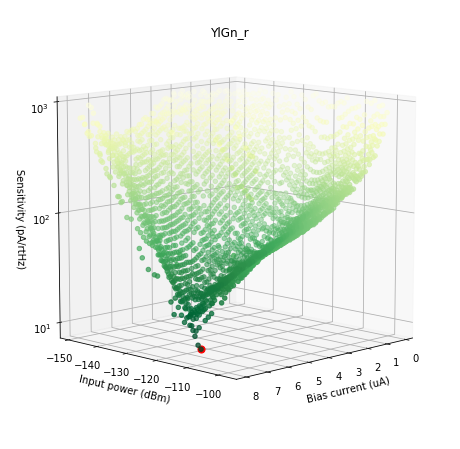

In [379]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111,projection='3d')

Z = np.log10(y2d.flatten())
thres=1e3
idx = np.where(y2d.flatten()<thres)
cmap = 'YlGn_r'
sc = ax.scatter(xxx.flatten()[idx], yyy.flatten()[idx], Z[idx], c=Z[idx], marker='o',cmap=cmap)#,s=1)
# ax.set_title('Full measurement data')
ax.set_title(cmap)
ax.set_xlabel('Bias current (uA)')
ax.set_ylabel('Input power (dBm)')
ax.set_zlabel('Sensitivity (pA/rtHz)')

# # project onto bottom surface
# cmap = plt.cm.cividis_r
# Z = np.log10(y2d)
# norm = matplotlib.colors.Normalize(vmin=np.nanmin(Z), vmax=np.nanmax(Z) )
# colors = cmap(norm(Z))
# ax.plot_surface(xxx,yyy,np.zeros_like(xxx), facecolors=colors, shade=False)

# to scale in log, from https://github.com/matplotlib/matplotlib/issues/209#issuecomment-263227447
import matplotlib.ticker as mticker
def log_tick_formatter(val, pos=None):
    return r"$10^{% .0f}$" % val

ax.set_zticks([1,2,3])
ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.view_init(10,45)
ax.set_zlim(0.9,3)

ax.scatter(xmin,ymin,np.log10(zmin),c='r',s=50)

In [380]:
panel2D_meas = {'x':xxx.flatten()[idx],'y':yyy.flatten()[idx],'z':Z[idx],
             'xlabel':'Bias current (µA)','ylabel':'Power at sample (dBm)','zlabel':'Sensitivity (pA/rtHz)',}
pickle.dump(panel2D_meas,
            open('data_final/fig4_panel2D_meas.pkl','wb'))

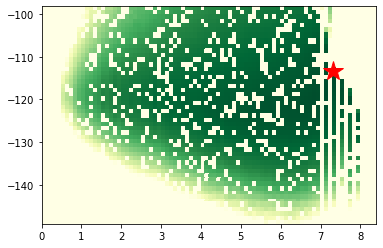

In [381]:
plt.pcolormesh(xxx,yyy,y2d,cmap='YlGn_r')
plt.plot(xmin,ymin,'r*',markersize=20)
plt.clim(1,400)

In [382]:
panel_a = {'x':xxx,'y':yyy,'z':y2d,
             'xlabel':'Bias current (µA)','ylabel':'Power at sample (dBm)','zlabel':'Sensitivity (pA/rtHz)',
            'xmin':xmin,'ymin':ymin,'zmin':zmin,
          'idxmin':idxmin,'idymin':idymin}
pickle.dump(panel_a,
            open('data_final/fig4_panel_a_v2.pkl','wb'))

In [350]:
panel_a['xmin']

7.300000000000001

## theory

In [514]:
expfiles = sorted(glob.glob('data_final/fig3_panel_Ppump_1JJ_*.pkl'))
itheo = []
xtheo = []
ytheo = []
xtheo2 = []
ytheo2 = []
for expfile in expfiles:
    expdata = pickle.load(open(expfile,'rb'))
    if not np.any(np.isnan(expdata['ytheo'])):
        itheo.append([expdata['Iset (A)']]*len(expdata['xtheo']))
        xtheo.append(expdata['xtheo'])
        ytheo.append(expdata['ytheo'])
        xtheo2.append(expdata['xtheo2'])
        ytheo2.append(expdata['ytheo2'])
    
itheo = np.array(itheo).T/1e-6
xtheo = np.array(xtheo).T
ytheo = np.array(ytheo).T
xtheo2 = np.array(xtheo2).T
ytheo2 = np.array(ytheo2).T

In [515]:
# ytheo = Sens(ipp=Iac, signal=ytheo, background=expnoisef(itheo*1e-6), RBW=5)/1e-12
# ytheo2 = Sens(ipp=Iac, signal=ytheo2, background=expnoisef(itheo*1e-6), RBW=5)/1e-12
ytheo = Sens(ipp=Iac, signal=ytheo, background=expnoisemean_log, RBW=5)/1e-12
ytheo2 = Sens(ipp=Iac, signal=ytheo2, background=expnoisemean_log, RBW=5)/1e-12

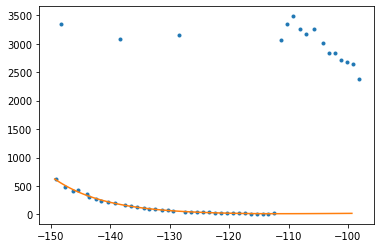

In [516]:
plt.plot(yyy[:,0],y2d[:,panel_a['idymin']],'.',label=panel_a['x'][0,panel_a['idymin']])
plt.plot(xtheo[:,0],ytheo[:,panel_d['idymin']],label=panel_d['x'][0,panel_d['idymin']])
# plt.yscale('log')
plt.show()
plt.close()

In [517]:
np.min(ytheo), np.min(ytheo2)

(11.59654478734573, 2.789863447621574)

In [518]:
ytheo.shape

(101, 78)

In [519]:
np.max(itheo)

7.700000000000001

In [520]:
xtheo[idxmin,0]

-113.83617813

In [521]:
idxmin, idymin = 71,75 # 140, 75
zmin = ytheo[idxmin,idymin]
xmin = itheo[0,idymin]
ymin = xtheo[idxmin,0]
xmin,ymin,zmin

(7.500000000000001, -113.83617813, 13.245689397368832)

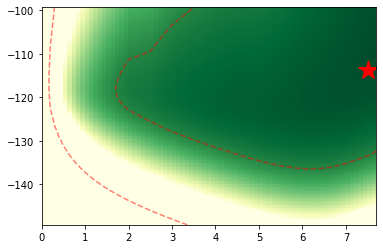

In [522]:
plt.contour(itheo,xtheo,ytheo,levels=[1,10,100,1000],colors='red',alpha=0.5,linestyles='dashed')
plt.pcolormesh(itheo,xtheo,ytheo,cmap='YlGn_r')#,norm=colors.LogNorm(vmin=1, vmax=1000))
plt.plot(xmin,ymin,'r*',markersize=20)
plt.clim(1,400)

In [523]:
panel_d = {'x':itheo,'y':xtheo,'z':ytheo,
             'xlabel':'Bias current (µA)','ylabel':'Power at sample (dBm)','zlabel':'Sensitivity (pA/rtHz)',
            'xmin':xmin,'ymin':ymin,'zmin':zmin,
          'idxmin':idxmin,'idymin':idymin}
pickle.dump(panel_d,
            open('data_final/fig4_panel_d_v2.pkl','wb'))

In [524]:
idxmin2, idymin2 = idxmin,idymin
zmin2 = ytheo2[idxmin2,idymin2]
xmin2 = itheo[0,idymin2]
ymin2 = xtheo2[idxmin2,0]
print(xmin2,ymin2,zmin2)

7.500000000000001 -113.83617813 10.462494330367857


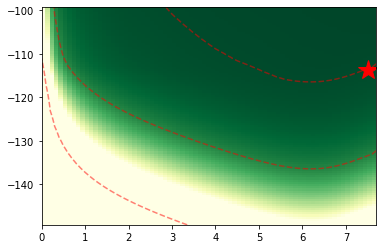

In [525]:
plt.contour(itheo,xtheo2,ytheo2,levels=[1,10,100,1000],colors='red',alpha=0.5,linestyles='dashed')
plt.pcolormesh(itheo,xtheo2,ytheo2,cmap='YlGn_r')
plt.plot(xmin,ymin,'r*',markersize=20)
plt.clim(1,400)

In [526]:
panel_5X = {'x':itheo,'y':xtheo2,'z':ytheo2,
             'xlabel':'Bias current (µA)','ylabel':'Power at sample (dBm)','zlabel':'Sensitivity (pA/rtHz)',
            'xmin':xmin2,'ymin':ymin2,'zmin':zmin2,
          'idxmin':idxmin2,'idymin':idymin2}
pickle.dump(panel_5X,
            open('data_final/fig5_panel_X_measonres.pkl','wb'))

## compare linecuts

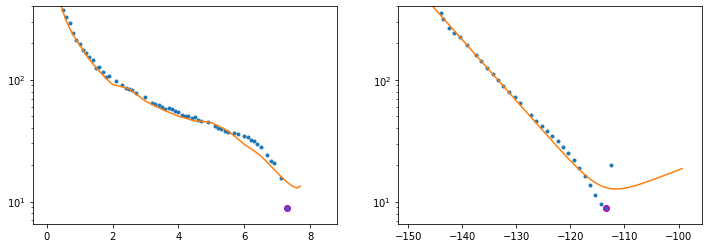

In [527]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))

plt.sca(ax1)
plt.scatter(panel_a['x'][0,panel_a['idymin']],panel_a['z'][panel_a['idxmin'],panel_a['idymin']],c='m')
plt.plot(panel_a['x'][0,:],panel_a['z'][panel_a['idxmin'],:],'.',label=panel_a['y'][panel_a['idxmin'],0])
plt.plot(panel_d['x'][0,:],panel_d['z'][panel_d['idxmin'],:],label=panel_d['y'][panel_d['idxmin'],0])
# plt.plot(panel_5X['x'][0,:],panel_5X['z'][panel_5X['idxmin'],:],label=panel_5X['y'][panel_5X['idxmin'],0])

plt.sca(ax2)
plt.scatter(panel_a['y'][panel_a['idxmin'],0],panel_a['z'][panel_a['idxmin'],panel_a['idymin']],c='m')
plt.plot(panel_a['y'][:,0],panel_a['z'][:,panel_a['idymin']],'.',label=panel_a['x'][0,panel_a['idymin']])
plt.plot(panel_d['y'][:,0],panel_d['z'][:,panel_d['idymin']],label=panel_d['x'][0,panel_d['idymin']])
# plt.plot(panel_5X['y'][:,0],panel_5X['z'][:,panel_5X['idymin']],label=panel_5X['x'][0,panel_5X['idymin']])

for theax in [ax1,ax2]:
    plt.sca(theax)
#     plt.legend(loc='lower left')
    plt.yscale('log')
    plt.gca().set_ylim(top=400)
    
plt.show()
plt.close()

### SM fig for extra detuning

This is to display that the deviations between measurement and theory versus pump power might be due to additional detuning

#### load theory

In [531]:
extrashift = np.arange(-600e3,501e3,100e3)

In [532]:
for theshift in extrashift:
    shiftid = '%+04dkHz' % (int(theshift/1e3))
    print(shiftid)
    
    expfiles = sorted(glob.glob('data_final/fig3_panel_Ppump_1JJv2detuningcheck_'+shiftid+'*.pkl'))
    itheo = []
    xtheo = []
    ytheo = []
    for expfile in expfiles:
        expdata = pickle.load(open(expfile,'rb'))
        if not np.any(np.isnan(expdata['ytheo'])):
            itheo.append([expdata['Iset (A)']]*len(expdata['xtheo']))
            xtheo.append(expdata['xtheo'])
            ytheo.append(expdata['ytheo'])

    itheo = np.array(itheo).T/1e-6
    xtheo = np.array(xtheo).T
    ytheo = np.array(ytheo).T
    
    ytheo = Sens(ipp=Iac, signal=ytheo, background=expnoisemean_log, RBW=5)/1e-12
    
    zmin = ytheo[idxmin,idymin]
    xmin = itheo[0,idymin]
    ymin = xtheo[idxmin,0]
    
    panel_dX = {'x':itheo,'y':xtheo,'z':ytheo,
             'xlabel':'Bias current (µA)','ylabel':'Power at sample (dBm)','zlabel':'Sensitivity (pA/rtHz)',
            'xmin':xmin,'ymin':ymin,'zmin':zmin,
          'idxmin':idxmin,'idymin':idymin}
    pickle.dump(panel_dX,
                open('data_final/fig4_panel_d_v2_'+shiftid+'.pkl','wb'))

-600kHz
-500kHz
-400kHz
-300kHz
-200kHz
-100kHz
+000kHz
+100kHz
+200kHz
+300kHz
+400kHz
+500kHz


-600kHz


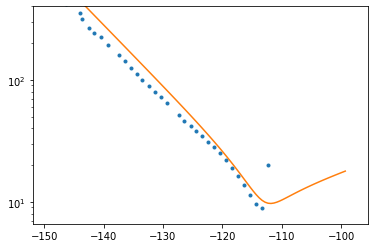

-500kHz


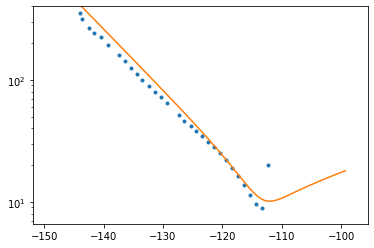

-400kHz


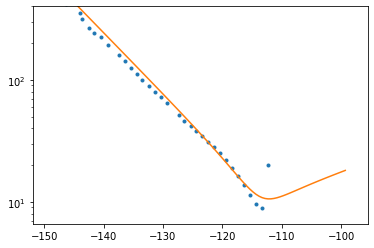

-300kHz


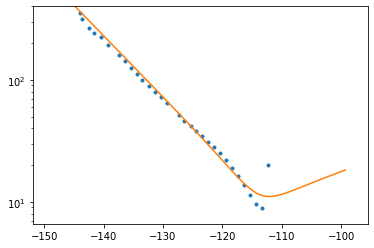

-200kHz


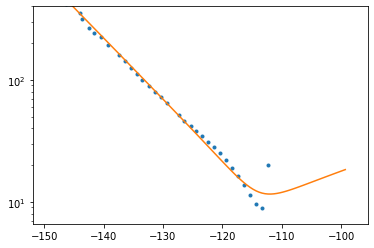

-100kHz


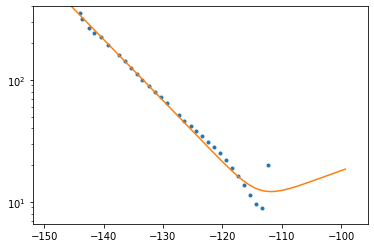

+000kHz


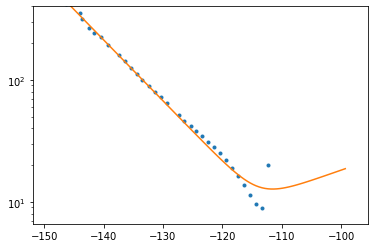

+100kHz


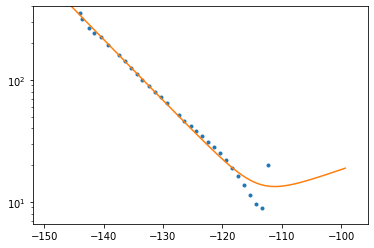

+200kHz


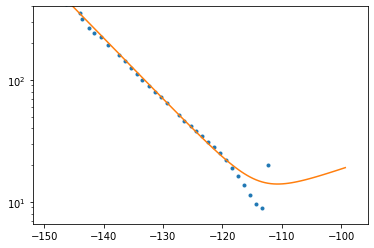

+300kHz


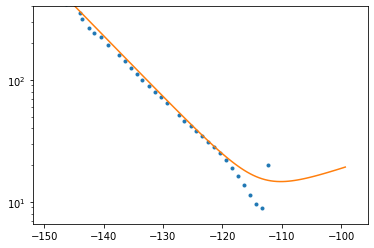

+400kHz


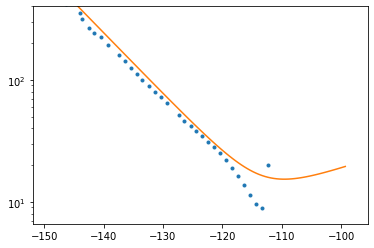

+500kHz


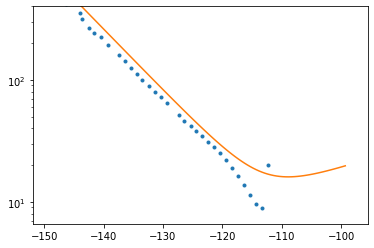

In [533]:
for theshift in extrashift:
    shiftid = '%+04dkHz' % (int(theshift/1e3))
    print(shiftid)    
    
    panel_dX = pickle.load(open('data_final/fig4_panel_d_v2_'+shiftid+'.pkl','rb'))
    
    plt.plot(panel_a['y'][:,0],panel_a['z'][:,panel_a['idymin']],'.',label=panel_a['x'][0,panel_a['idymin']])
    plt.plot(panel_dX['y'][:,0],panel_dX['z'][:,panel_dX['idymin']],label=panel_dX['x'][0,panel_dX['idymin']])
    plt.yscale('log')
    plt.gca().set_ylim(top=400)
    plt.show()
    plt.close()

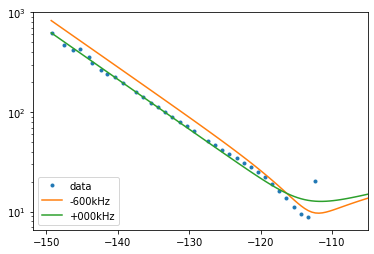

In [548]:
plt.plot(panel_a['y'][:,0],panel_a['z'][:,panel_a['idymin']],'.',label='data')

for theshift in [-600e3,0]:
    shiftid = '%+04dkHz' % (int(theshift/1e3))    
    panel_dX = pickle.load(open('data_final/fig4_panel_d_v2_'+shiftid+'.pkl','rb'))
    plt.plot(panel_dX['y'][:,0],panel_dX['z'][:,panel_dX['idymin']],label=shiftid)

plt.yscale('log')
plt.legend(loc='best')
plt.gca().set_ylim(top=1000)
plt.gca().set_xlim(right=-105)
plt.show()
plt.close()

In [549]:
# export the above points for final plotting
shiftid0,shiftid1 = '0 kHz','-600 kHz'
panel_dX0,panel_dX1 = pickle.load(open('data_final/fig4_panel_d_v2_+000kHz.pkl','rb')),pickle.load(open('data_final/fig4_panel_d_v2_-600kHz.pkl','rb'))

pkldump = {
    'xmeas':panel_a['y'][:,0],'ymeas':panel_a['z'][:,panel_a['idymin']],
    'xtheo0':panel_dX0['y'][:,0],'ytheo0':panel_dX0['z'][:,panel_dX0['idymin']],'shift0':shiftid0,
    'xtheo1':panel_dX1['y'][:,0],'ytheo1':panel_dX1['z'][:,panel_dX1['idymin']],'shift1':shiftid1,
    'xlabel':'Power at sample (dBm)','ylabel':'Sensitivity (pA/rtHz)'
}

pickle.dump(pkldump,open('data_final/SM_pin_detuning.pkl','wb'))

## outlier removal

There are a lot of outliers due to the pump tone being off-resonant at high bias currents. This is due to our measurement scheme. We will neglect the data points that differ more than 50% from our theoretical model.

For now we will only do outlier removal of the linecuts

In [445]:
x1, y1, z1 = panel_a['x'],panel_a['y'],panel_a['z']
x2, y2, z2 = panel_d['x'],panel_d['y'],panel_d['z']

# z2interp = interp2d(x2.flatten(),y2.flatten(),z2)
points = np.array(list(zip(x2.flatten(),y2.flatten())))
values = z2.flatten()
z2grid = griddata(points,values,(x1,y1))

Actual Theory and interpolation match, so we can use the interpolated theory from now on.
Interpolated here means that we interpolate the theory values on the grid of the measured values


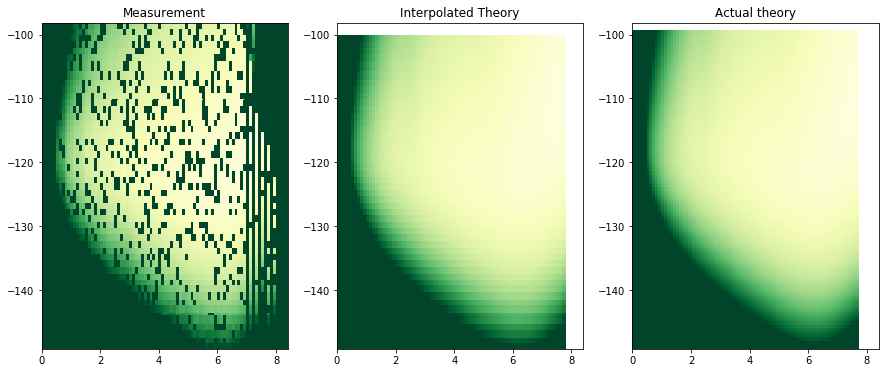

In [446]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,6))
plt.sca(ax1)
plt.pcolormesh(x1,y1,z1,cmap='YlGn')
plt.clim(1,400)
plt.title('Measurement')
plt.sca(ax2)
plt.pcolormesh(x1,y1,z2grid,cmap='YlGn')
plt.clim(1,400)
plt.title('Interpolated Theory')
plt.sca(ax3)
plt.pcolormesh(x2,y2,z2,cmap='YlGn')
plt.clim(1,400)
plt.xlim(np.min(x1),np.max(x1))
plt.ylim(np.min(y1),np.max(y1))
plt.title('Actual theory')

print('Actual Theory and interpolation match, so we can use the interpolated theory from now on.')
print('Interpolated here means that we interpolate the theory values on the grid of the measured values')

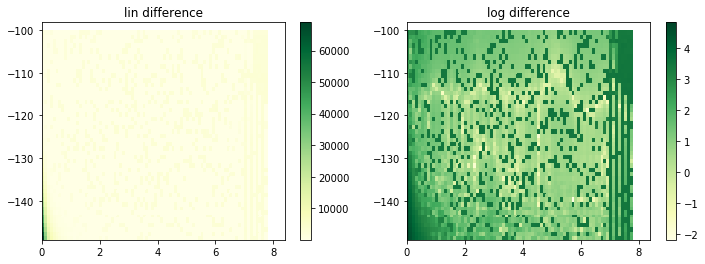

In [447]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
plt.sca(ax1)
plt.title('lin difference')
plt.pcolormesh(x1,y1,abs(z1-z2grid),cmap='YlGn')
plt.colorbar()
plt.sca(ax2)
plt.title('log difference')
plt.pcolormesh(x1,y1,np.log10(abs(z1-z2grid)),cmap='YlGn')
plt.colorbar()

In [481]:
# 50% difference as threshold
thres = 0.5
DeltaZ = abs((z1-z2grid)/z2grid)
data_masked=np.ma.MaskedArray(z1, DeltaZ < thres)

# # 1000pA/rtHz as threshold
# thres = 1000
# data_masked=np.ma.MaskedArray(z1, z1 < thres)

/home/feschmidt/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


The larger the value, the higher the relative difference.
We want to filter the pixels where DeltaZ>0.5
White pixels are to be filtered out


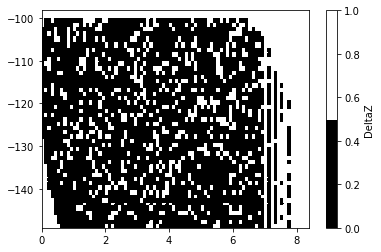

In [482]:
cmap = cm.get_cmap('binary_r', 2) # 3 steps
plt.pcolormesh(x1,y1,DeltaZ,cmap=cmap,vmin=0,vmax=2*thres)
plt.colorbar(label='DeltaZ')
print('The larger the value, the higher the relative difference.')
print('We want to filter the pixels where DeltaZ>0.5')
print('White pixels are to be filtered out')

In [483]:
data_masked

masked_array(
  data=[[2118.9242091423603, 2049.398622227103, 1533.7062713027108, ...,
         2315.828671072166, 2428.3896902426713, 2391.263315703117],
        [2425.0623322125907, 1939.2657839031856, 2353.900116532453, ...,
         2677.179814921181, 2635.9557527644915, 2595.6628500762413],
        [2427.9481945435264, --, --, ..., 2557.924109842762,
         2561.7060113557827, 2701.650629058616],
        ...,
        [3568.2081916056004, 3461.5635880628506, 3075.832832287012, ...,
         3521.21288113243, 3666.59361143713, 3262.517590247352],
        [3669.14200107394, 3518.3221898904426, 3445.628519289433, ...,
         3780.331741972905, 3437.964816646916, 3515.3288905608833],
        [3550.366098148528, 3108.031655028554, 3086.2655733455495, ...,
         3333.0105696819446, 3360.1392439872866, 3610.3625647032404]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False,  True,  True, ..., False, Fals

In [484]:
mymask = data_masked.mask

mm1 = np.where(mymask==False, np.nan, mymask)
mm2 = np.where(mymask==1, 0, mm1)
mm3 = mm2 + z1

In [485]:
np.nanmin(mm3)

8.901255382724944

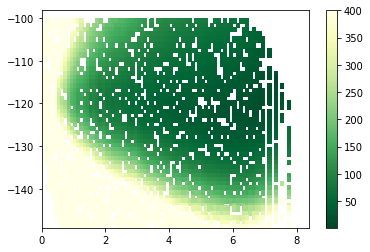

In [486]:
plt.pcolormesh(x1,y1,mm3,cmap='YlGn_r')
plt.colorbar()
plt.clim(1,400)

In [487]:
panel_fig4_exp_data = {'x':x1,'y':y1,'z':mm3,
             'xlabel':'Bias current (µA)','ylabel':'Power at sample (dBm)','zlabel':'Sensitivity (pA/rtHz)',
            'xmin':xmin,'ymin':ymin,'zmin':zmin,
          'idxmin':idxmin,'idymin':idymin}
pickle.dump(panel_fig4_exp_data,
            open('data_final/panel_fig4_exp_data.pkl','wb'))

In [488]:
def nan_helper(y):
    """Helper to handle indices and logical indices of NaNs.

    Input:
        - y, 1d numpy array with possible NaNs
    Output:
        - nans, logical indices of NaNs
        - index, a function, with signature indices= index(logical_indices),
          to convert logical indices of NaNs to 'equivalent' indices
    Example:
        >>> # linear interpolation of NaNs
        >>> nans, x= nan_helper(y)
        >>> y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    """

    return np.isnan(y), lambda z: z.nonzero()[0]

In [489]:
y=copy.deepcopy(mm3)

In [490]:
nans, x= nan_helper(mm3)
y[nans]= np.interp(x(nans), x(~nans), y[~nans])

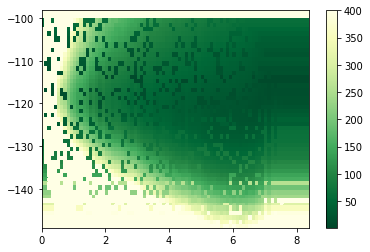

In [491]:
plt.pcolormesh(x1,y1,y,cmap='YlGn_r')
plt.colorbar()
plt.clim(1,400)

In [492]:
np.nanmin(y)

8.901255382724944

This is already pretty awesome! We masked all the data that differs from theory by more than 50% as nan. We'll try to take it one step further now, by interpolating the nans on the 2D grid. Code taken from [StackExchange](https://stackoverflow.com/questions/6518811/interpolate-nan-values-in-a-numpy-array)

In [493]:
# SETUP
a = copy.deepcopy(mm3)

# THE INTERPOLATION
x, y = np.indices(a.shape)
interp = np.array(a)
interp[np.isnan(interp)] = griddata(
     (x[~np.isnan(a)], y[~np.isnan(a)]), # points we know
     a[~np.isnan(a)],                    # values we know
     (x[np.isnan(a)], y[np.isnan(a)]))   # points to interpolate

Text(0.5, 1.0, 'Theory')

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


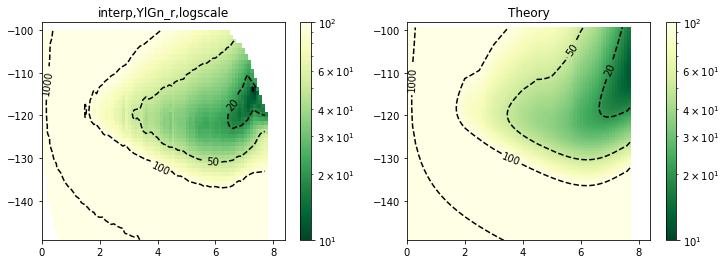

In [494]:
cmap = 'YlGn_r'
vmin=10
vmax = 1e2
levels = [1,10,20,50,1e2,1e3]
levc = 'k'
levalp=1
levst = 'dashed'

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))

plt.sca(ax1)

pcm1 = plt.pcolormesh(x1,y1,interp,cmap=cmap,norm=colors.LogNorm(vmin=vmin, vmax=vmax))
cs1 = plt.contour(x1,y1,interp,colors=levc,alpha=levalp,linestyles=levst,levels=levels)
cs1.levels = ['%.0f'%val for val in cs1.levels] # Recast levels to new class
ax1.clabel(cs1, cs1.levels, inline=True, fontsize=10) # label contours
plt.colorbar(pcm1)
plt.title('interp,'+cmap+',logscale')

plt.sca(ax2)

pcm2 = plt.pcolormesh(x2,y2,z2,cmap=cmap,norm=colors.LogNorm(vmin=vmin, vmax=vmax))
cs2 = plt.contour(x2,y2,z2,colors=levc,alpha=levalp,linestyles=levst,levels=levels)
cs2.levels = ['%.0f'%val for val in cs2.levels] # Recast levels to new class
ax2.clabel(cs2, cs2.levels, inline=True, fontsize=10) # label contours
plt.xlim(np.min(x1),np.max(x1))
plt.ylim(np.min(y1),np.max(y1))
plt.colorbar(pcm2)
plt.title('Theory')

In [495]:
panel_fig4_int_data = {'x':x1,'y':y1,'z':interp,
             'xlabel':'Bias current (µA)','ylabel':'Power at sample (dBm)','zlabel':'Sensitivity (pA/rtHz)',
            'xmin':xmin,'ymin':ymin,'zmin':zmin,
          'idxmin':idxmin,'idymin':idymin}
pickle.dump(panel_fig4_int_data,
            open('data_final/panel_fig4_int_data.pkl','wb'))

In [496]:
# are the minima still the same?
idxmin, idymin = np.unravel_index(np.nanargmin(interp), interp.shape)
zmin = interp[idxmin,idymin]
xmin = x1[0,idymin]
ymin = y1[idxmin,0]
xmin,ymin,zmin
# yes they are

(7.300000000000001, -113.39645202606127, 8.901255382724944)

In [402]:
dIshift = abs(x1[0,-1]-x1[0,-2])/2
dPshift = abs(y1[-1,0]-y1[-2,0])/2

We need to shift all the pixels to line up with the linecut data


/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


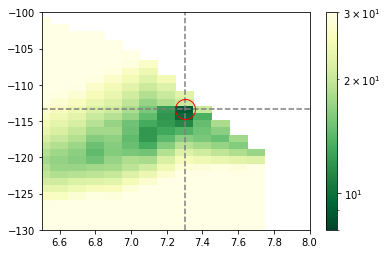

In [403]:
# checking if everything got interpolated properly
import matplotlib
cmap = matplotlib.cm.get_cmap('YlGn_r')

fig,ax1=plt.subplots(1)
pcm1 = plt.pcolormesh(x1-dIshift,y1+dPshift,interp,cmap=cmap,norm=colors.LogNorm(vmin=vmin, vmax=vmax))
print('We need to shift all the pixels to line up with the linecut data')
plt.colorbar(pcm1)
plt.xlim(6.5,8)
plt.ylim(-130,-100)
plt.clim(8,30)
plt.axvline(xmin,c='grey',ls='--')
plt.axhline(ymin,c='grey',ls='--')
plt.plot(xmin,ymin,'o',markerfacecolor='none',markeredgecolor='r',markersize=20)
plt.show()
plt.close()

In [404]:
# export again, this time includnig the shifts
panel_fig4_int_data = {'x':x1-dIshift,'y':y1+dPshift,'z':interp,
             'xlabel':'Bias current (µA)','ylabel':'Power at sample (dBm)','zlabel':'Sensitivity (pA/rtHz)',
            'xmin':xmin,'ymin':ymin,'zmin':zmin,
          'idxmin':idxmin,'idymin':idymin}
pickle.dump(panel_fig4_int_data,
            open('data_final/panel_fig4_int_data.pkl','wb'))

### outlier removal versus bias current

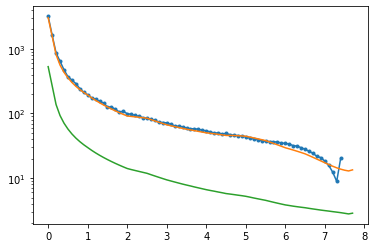

In [405]:
x1 = panel_a['x'][0,:]
y1 = interp[panel_a['idxmin'],:] #panel_a['z']
x2 = panel_d['x'][0,:]
y2 = panel_d['z'][panel_d['idxmin'],:]
x3 = panel_5X['x'][0,:]
y3 = panel_5X['z'][-1,:]
plt.plot(x1,y1,'.-',label='data')
plt.plot(x2,y2,label='theo')
plt.plot(x3,y3,label='onres')
plt.yscale('log')

In [406]:
y2int = interp1d(x2,y2,bounds_error=False)

/home/feschmidt/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


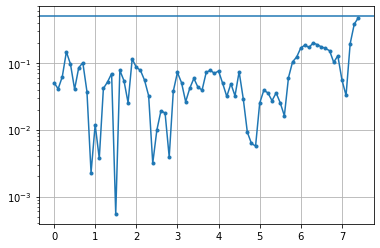

In [407]:
Deltag = abs(y1-y2int(x1))/y2int(x1)
plt.plot(x1,Deltag,'.-')
thres = 0.5 # maximum relative difference of 50%
plt.axhline(thres)
plt.grid()
# plt.ylim(0,2500)
plt.yscale('log')

idfilter = np.where(abs(Deltag)<thres)

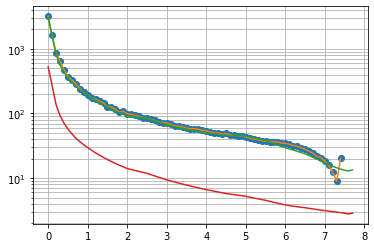

In [408]:
plt.plot(x1,y1,'o')
plt.plot(x1[idfilter],y1[idfilter])
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.yscale('log')
plt.grid(which='both')

In [409]:
# export data
panel_b = {'xmeas':x1[idfilter],'ymeas':y1[idfilter],
           'xtheo':x2,'ytheo':y2,'xtheo2':x3,'ytheo2':y3,
           'xlabel':'Bias current (µA)','ylabel':'Sensitivity (pA/rtHz)',
           'xmin':panel_a['x'][0,panel_a['idymin']],'ymin':panel_a['z'][panel_a['idxmin'],panel_a['idymin']]
          }
pickle.dump(panel_b,
            open('data_final/fig4_panel_b_v2.pkl','wb'))

### filter versus pump power

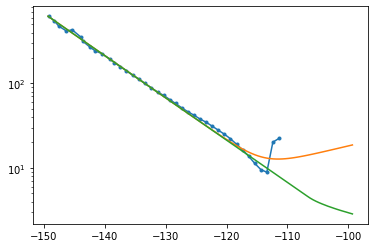

In [410]:
x1 = panel_a['y'][:,0]
y1 = interp[:,panel_a['idymin']] #panel_a['z']
x2 = panel_d['y'][:,0]
y2 = panel_d['z'][:,panel_d['idymin']]
x3 = panel_5X['y'][:,0]
y3 = panel_5X['z'][:,panel_d['idymin']]
plt.plot(x1,y1,'.-',label='data')
plt.plot(x2,y2,label='theory')
plt.plot(x3,y3,label='onres')
plt.yscale('log')

In [411]:
y2int = interp1d(x2,y2,bounds_error=False)

/home/feschmidt/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


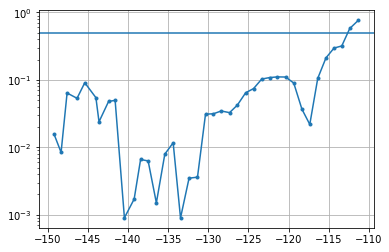

In [412]:
Deltag = abs(y1-y2int(x1))/y2int(x1)
plt.plot(x1,Deltag,'.-')
thres = 0.5 # maximum relative difference of 50%
plt.axhline(thres)
plt.grid()
# plt.ylim(0,2500)
plt.yscale('log')

idfilter = np.where(abs(Deltag)<thres)

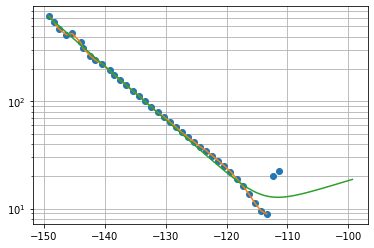

In [413]:
plt.plot(x1,y1,'o')
plt.plot(x1[idfilter],y1[idfilter])
plt.plot(x2,y2)
plt.yscale('log')
plt.grid(which='both')

In [415]:
# export
panel_c = {'xmeas':x1,'ymeas':y1,
#            'xmeas':x1[idfilter],'ymeas':y1[idfilter],
           'xtheo':x2,'ytheo':y2,
           'xlabel':'Power at sample (dBm)','ylabel':'Sensitivity (pA/rtHz)',
           'xmin':panel_a['y'][panel_a['idxmin'],0],'ymin':panel_a['z'][panel_a['idxmin'],panel_a['idymin']]
          }
pickle.dump(panel_c,
            open('data_final/fig4_panel_c_v2.pkl','wb'))

## comparing $-\Omega$ and $+\Omega$ sidebands

In [416]:
myfile = glob.glob('data_plots/pos2/F33_pwr_f0-1f1_mtx_amplitude.pkl')
ampltd2d=pickle.load(open(myfile[0],'rb'))
x2d = ampltd2d.pmtx.axes[0].values+power_in['input_att_SG (dB)']+2
i2d = ampltd2d.pmtx.axes[1].values
y2d = ampltd2d.pmtx.values
xxx,yyy=np.meshgrid(i2d,x2d)

In [417]:
myfilep = glob.glob('data_plots/pos2/F33_pwr_f0+1f1_mtx_amplitude.pkl')
ampltd2dp=pickle.load(open(myfilep[0],'rb'))
x2dp = ampltd2dp.pmtx.axes[0].values+power_in['input_att_SG (dB)']+2
i2dp = ampltd2dp.pmtx.axes[1].values
y2dp = ampltd2dp.pmtx.values
xxxp,yyyp=np.meshgrid(i2dp,x2dp)

### Amplitudes

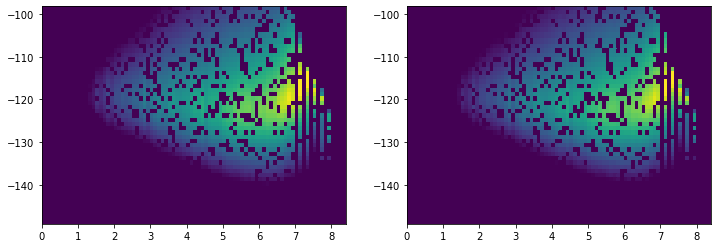

In [418]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
plt.sca(ax1)
plt.pcolormesh(xxx,yyy,y2d)
plt.clim(-60,-40)
plt.sca(ax2)
plt.pcolormesh(xxxp,yyyp,y2dp)
plt.clim(-60,-40)

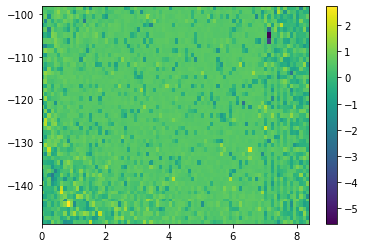

In [419]:
plt.pcolormesh(xxx,yyy,y2d-y2dp)
plt.colorbar()

### Sensitivities

In [420]:
y2d = Sens(ipp=Iac, signal=y2d, background=expnoisemean_log, RBW=5)/1e-12
y2dp = Sens(ipp=Iac, signal=y2dp, background=expnoisemean_log, RBW=5)/1e-12

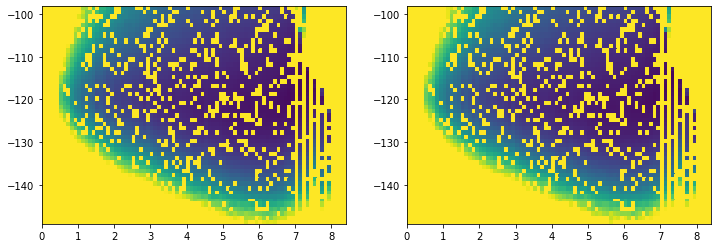

In [421]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
plt.sca(ax1)
plt.pcolormesh(xxx,yyy,y2d)
plt.clim(1,400)
plt.sca(ax2)
plt.pcolormesh(xxxp,yyyp,y2dp)
plt.clim(1,400)

In [422]:
np.nanmin(y2d),np.nanmin(y2dp)

(8.901255382724944, 9.517265775086448)

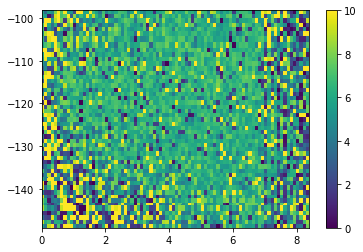

In [423]:
plt.pcolormesh(xxx,yyy,abs(y2d-y2dp)/y2d*100,vmin=0,vmax=10)
plt.colorbar()

### Theory

In [425]:
expfiles = sorted(glob.glob('data_final/fig3_panel_Ppump_1JJ_*.pkl'))
itheo = []
xtheo = []
ytheo = []
xtheo2 = []
ytheo2 = []
for expfile in expfiles:
    expdata = pickle.load(open(expfile,'rb'))
    if not np.any(np.isnan(expdata['ytheo'])):
        itheo.append([expdata['Iset (A)']]*len(expdata['xtheo']))
        xtheo.append(expdata['xtheo'])
        ytheo.append(expdata['ytheo'])
        xtheo2.append(expdata['xtheop'])
        ytheo2.append(expdata['ytheop'])
    
itheo = np.array(itheo).T/1e-6
xtheo = np.array(xtheo).T
ytheo = np.array(ytheo).T
xtheo2 = np.array(xtheo2).T
ytheo2 = np.array(ytheo2).T

ytheo = Sens(ipp=Iac, signal=ytheo, background=expnoisemean_log, RBW=5)/1e-12
ytheo2 = Sens(ipp=Iac, signal=ytheo2, background=expnoisemean_log, RBW=5)/1e-12

points = np.array(list(zip(itheo.flatten(),xtheo.flatten())))
values = ytheo.flatten()
z2grid = griddata(points,values,(xxx,yyy))
pointsp = np.array(list(zip(itheo.flatten(),xtheo2.flatten())))
valuesp = ytheo2.flatten()
z2gridp = griddata(pointsp,valuesp,(xxx,yyy))

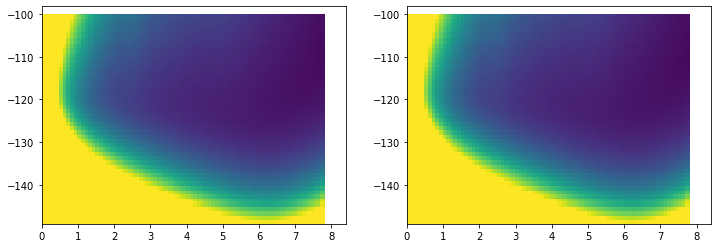

In [426]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
plt.sca(ax1)
plt.pcolormesh(xxx,yyy,z2grid)
plt.clim(1,400)
plt.sca(ax2)
plt.pcolormesh(xxx,yyy,z2gridp)
plt.clim(1,400)

### Outlier removal

In [427]:
thres = 0.5
DeltaZ = abs((y2d-z2grid)/z2grid)
data_masked=np.ma.MaskedArray(y2d, DeltaZ < thres)
DeltaZp = abs((y2dp-z2gridp)/z2gridp)
data_maskedp=np.ma.MaskedArray(y2dp, DeltaZp < thres)

/home/feschmidt/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
/home/feschmidt/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


In [428]:
mymask = data_masked.mask
mm1 = np.where(mymask==False, np.nan, mymask)
mm2 = np.where(mymask==1, 0, mm1)
mm3 = mm2 + y2d

mymaskp = data_maskedp.mask
mm1p = np.where(mymaskp==False, np.nan, mymaskp)
mm2p = np.where(mymaskp==1, 0, mm1p)
mm3p = mm2p + y2dp

In [429]:
np.nanmin(mm3),np.nanmin(mm3p)

(8.901255382724944, 9.517265775086448)

In [430]:
a = copy.deepcopy(mm3)
ap = copy.deepcopy(mm3p)

In [431]:
# THE INTERPOLATION
x, y = np.indices(a.shape)
interp = np.array(a)
interp[np.isnan(interp)] = griddata(
     (x[~np.isnan(a)], y[~np.isnan(a)]), # points we know
     a[~np.isnan(a)],                    # values we know
     (x[np.isnan(a)], y[np.isnan(a)]))   # points to interpolate

# THE INTERPOLATION
xp, yp = np.indices(ap.shape)
interpp = np.array(ap)
interpp[np.isnan(interpp)] = griddata(
     (xp[~np.isnan(ap)], yp[~np.isnan(ap)]), # points we know
     ap[~np.isnan(ap)],                    # values we know
     (xp[np.isnan(ap)], yp[np.isnan(ap)]))   # points to interpolate

In [432]:
np.nanmin(interp),np.nanmin(interpp)

(8.901255382724944, 9.517265775086448)

Text(0.5, 1.0, '$+\\Omega$')

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


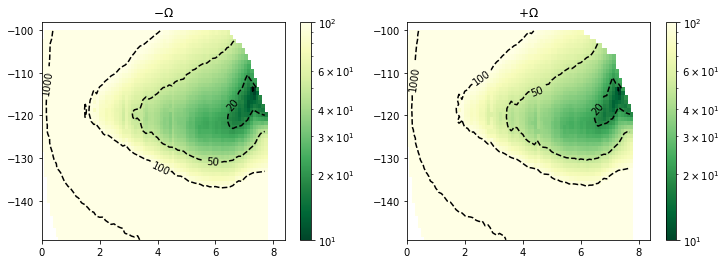

In [433]:
cmap = 'YlGn_r'
vmin=10
vmax = 1e2
levels = [1,10,20,50,1e2,1e3]
levc = 'k'
levalp=1
levst = 'dashed'

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))

plt.sca(ax1)
pcm1 = plt.pcolormesh(xxx,yyy,interp,cmap=cmap,norm=colors.LogNorm(vmin=vmin, vmax=vmax))
cs1 = plt.contour(xxx,yyy,interp,colors=levc,alpha=levalp,linestyles=levst,levels=levels)
cs1.levels = ['%.0f'%val for val in cs1.levels] # Recast levels to new class
ax1.clabel(cs1, cs1.levels, inline=True, fontsize=10) # label contours
plt.colorbar(pcm1)
plt.title('$-\Omega$')


plt.sca(ax2)
pcm2 = plt.pcolormesh(xxx,yyy,interpp,cmap=cmap,norm=colors.LogNorm(vmin=vmin, vmax=vmax))
cs2 = plt.contour(xxx,yyy,interpp,colors=levc,alpha=levalp,linestyles=levst,levels=levels)
cs2.levels = ['%.0f'%val for val in cs2.levels] # Recast levels to new class
ax2.clabel(cs2, cs2.levels, inline=True, fontsize=10) # label contours
plt.colorbar(pcm2)
plt.title('$+\Omega$')

In [434]:
dIshift = abs(xxx[0,-1]-xxx[0,-2])/2
dPshift = abs(yyy[-1,0]-yyy[-2,0])/2

In [435]:
idxmin, idymin = np.unravel_index(np.nanargmin(y2d), y2d.shape)
zmin = y2d[idxmin,idymin]
xmin = xxx[0,idymin]
ymin = yyy[idxmin,0]
xmin,ymin,zmin,np.nanmin(interp)

(7.300000000000001, -113.39645202606127, 8.901255382724944, 8.901255382724944)

In [436]:
SM_panel_fig4_int_m1 = {'x':xxx-dIshift,'y':yyy+dPshift,'z':interp,
                        'xmin':xmin,'ymin':ymin,'zmin':zmin,
             'xlabel':'Bias current (µA)','ylabel':'Power at sample (dBm)','zlabel':'Sensitivity (pA/rtHz)'}
pickle.dump(SM_panel_fig4_int_m1,
            open('data_final/SM_panel_fig4_int_m1.pkl','wb'))

In [437]:
idxminp, idyminp = np.unravel_index(np.nanargmin(y2dp), y2dp.shape)
zminp = y2dp[idxminp,idyminp]
xminp = xxxp[0,idyminp]
yminp = yyyp[idxminp,0]
xminp,yminp,zminp

(7.300000000000001, -113.39645202606127, 9.517265775086448)

In [438]:
SM_panel_fig4_int_p1 = {'x':xxxp-dIshift,'y':yyyp+dPshift,'z':interpp,
                        'xmin':xminp,'ymin':yminp,'zmin':zminp,
             'xlabel':'Bias current (µA)','ylabel':'Power at sample (dBm)','zlabel':'Sensitivity (pA/rtHz)'}
pickle.dump(SM_panel_fig4_int_p1,
            open('data_final/SM_panel_fig4_int_p1.pkl','wb'))

### linecuts

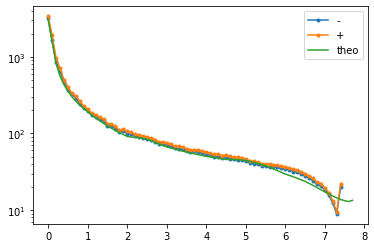

In [439]:
x1 = xxx[0,:]
y1 = interp[idxmin,:]
x1p = xxxp[0,:]
y1p = interpp[idxminp,:]
x2 = panel_d['x'][0,:]
y2 = panel_d['z'][panel_d['idxmin'],:]
plt.plot(x1,y1,'.-',label='-')
plt.plot(x1p,y1p,'.-',label='+')
plt.plot(x2,y2,label='theo')
plt.yscale('log')
plt.legend()
plt.show()
plt.close()

In [440]:
np.nanmin(y1),np.nanmin(y1p)

(8.901255382724944, 9.517265775086448)

In [441]:
SM_panel_fig4_current = {'xm':x1,'ym':y1,'xp':x1p,'yp':y1p,'xtheo':x2,'ytheo':y2,
             'xlabel':'Bias current (µA)','ylabel':'Sensitivity (pA/rtHz)'}
pickle.dump(SM_panel_fig4_current,
            open('data_final/SM_panel_fig4_current.pkl','wb'))

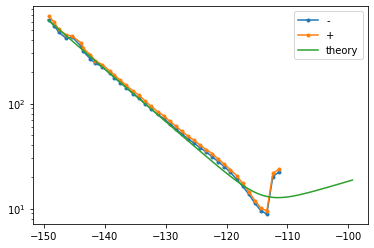

In [442]:
x1 = yyy[:,0]
y1 = interp[:,idymin]
x1p = yyyp[:,0]
y1p = interpp[:,idyminp]
x2 = panel_d['y'][:,0]
y2 = panel_d['z'][:,panel_d['idymin']]
plt.plot(x1,y1,'.-',label='-')
plt.plot(x1p,y1p,'.-',label='+')
plt.plot(x2,y2,label='theory')
plt.yscale('log')
plt.legend()
plt.show()
plt.close()

In [443]:
np.nanmin(y1),np.nanmin(y1p)

(8.901255382724944, 9.517265775086448)

In [444]:
SM_panel_fig4_power = {'xm':x1,'ym':y1,'xp':x1p,'yp':y1p,'xtheo':x2,'ytheo':y2,
             'xlabel':'Power at sample (dBm)','ylabel':'Sensitivity (pA/rtHz)'}
pickle.dump(SM_panel_fig4_power,
            open('data_final/SM_panel_fig4_power.pkl','wb'))